<a href="https://colab.research.google.com/github/sahilbaishya/HandsOnML/blob/main/Nerual_Nets_With_Keras_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import sklearn
from tensorflow import keras

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Image Classifier using Sequential API - Fashion MNIST Dataset

## Data Fetching and Exploration

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data();

4422102/4422102 [==============================] - 1s 0us/step


In [4]:
X_train_full.shape

(60000, 28, 28)

In [5]:
X_train_full.dtype

dtype('uint8')

In [6]:
X_test.shape

(10000, 28, 28)

## Splitting And Modeling

In [7]:
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [8]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


In [9]:
class_names[y_train[0]]

'Coat'

In [10]:
model = keras.models.Sequential([
    keras.layers.InputLayer(input_shape=[28, 28]),
    keras.layers.Flatten(),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


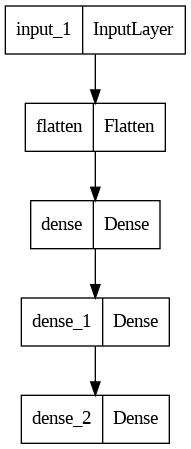

In [13]:
keras.utils.plot_model(model)

## Data Visualization

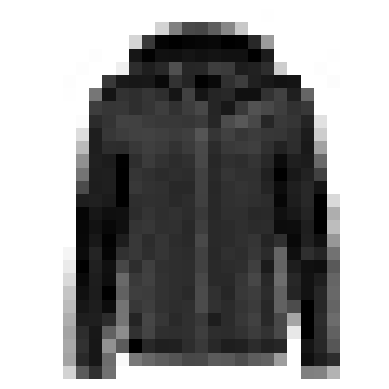

In [14]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

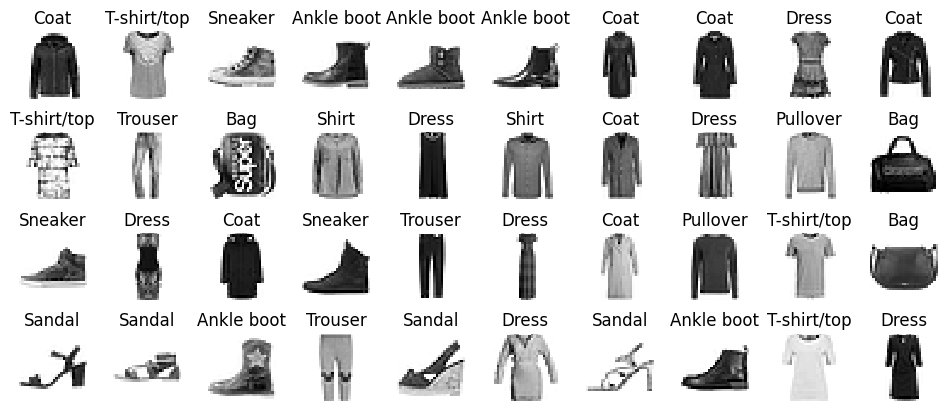

In [15]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.savefig('fashion_mnist_plot', bbox_inches='tight',pad_inches = 0)
plt.show()

## Model Exploration

In [16]:
model.layers

In [17]:
hidden1 = model.layers[1]

In [18]:
weights, biases = hidden1.get_weights()

In [19]:
weights

array([[-0.01160794, -0.01778122, -0.05609781, ...,  0.01714947,
         0.06362695,  0.0609954 ],
       [ 0.06435055,  0.04940163,  0.01294333, ..., -0.01094279,
        -0.06739497, -0.027944  ],
       [ 0.00063477, -0.04623079, -0.06659718, ...,  0.03461911,
        -0.01680422,  0.0565145 ],
       ...,
       [ 0.02950647, -0.00065607, -0.05967002, ...,  0.02826885,
        -0.00818308, -0.07389849],
       [ 0.04693981,  0.02903467,  0.0321919 , ..., -0.06153467,
        -0.03406991, -0.06317443],
       [ 0.00131045, -0.03888159, -0.05293717, ...,  0.03912667,
        -0.0305092 , -0.01079639]], dtype=float32)

In [20]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [21]:
weights.shape

(784, 300)

In [22]:
biases.shape

(300,)

In [23]:
hidden2 = model.layers[2]
w2, b2 = hidden2.get_weights()

In [24]:
w2.shape

(300, 100)

In [25]:
b2.shape

(100,)

## Compilation and Training

In [26]:
model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = 'sgd',
    metrics = ['accuracy']
)

In [27]:
history = model.fit(X_train, y_train, epochs = 30,
                    validation_data = (X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 12s 4ms/step - loss: 0.7037 - accuracy: 0.7664 - val_loss: 0.4917 - val_accuracy: 0.8306
Epoch 2/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4836 - accuracy: 0.8299 - val_loss: 0.4338 - val_accuracy: 0.8490
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4413 - accuracy: 0.8446 - val_loss: 0.4135 - val_accuracy: 0.8598
Epoch 4/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4134 - accuracy: 0.8538 - val_loss: 0.4005 - val_accuracy: 0.8608
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3928 - accuracy: 0.8615 - val_loss: 0.3744 - val_accuracy: 0.8694
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3767 - accuracy: 0.8672 - val_loss: 0.3786 - val_accuracy: 0.8664
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3633 - accuracy: 0.8723 - val_loss: 0.3668 - val_accuracy

In [28]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [ ]:
history.epoch

In [ ]:
history.history

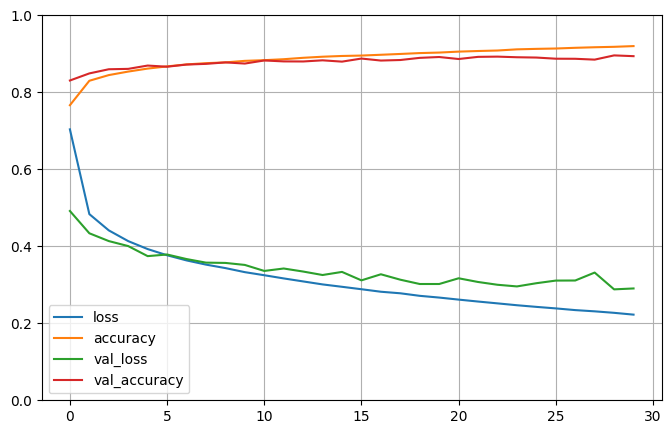

In [33]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [34]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 57.9364 - accuracy: 0.8592


[57.93644332885742, 0.8592000007629395]

In [35]:
X_new = X_test[:3]

In [36]:
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 84ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [37]:
pred_classes = np.argmax(y_proba, axis =1)
pred_classes

array([9, 2, 1])

In [38]:
np.array(class_names)[pred_classes]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [39]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

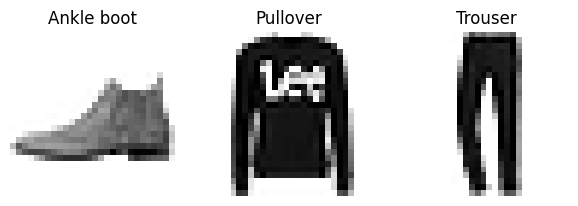

In [43]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.savefig('fashion_mnist_images_plot', format="png")
plt.show()

# Regression MLP using Sequential API - California Housing

In [53]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [46]:
np.random.seed(42)
tf.random.set_seed(42)

In [47]:
model = keras.models.Sequential([
 keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
 keras.layers.Dense(1)
])

In [48]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 30)                270       
                                                                 
 dense_4 (Dense)             (None, 1)                 31        
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [49]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3), metrics = ['accuracy'])

In [50]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 30)                270       
                                                                 
 dense_4 (Dense)             (None, 1)                 31        
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [51]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 3s 6ms/step - loss: 2.0931 - accuracy: 0.0027 - val_loss: 1.2463 - val_accuracy: 0.0044
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.7477 - accuracy: 0.0029 - val_loss: 0.6501 - val_accuracy: 0.0044
Epoch 3/20
363/363 [==============================] - 1s 4ms/step - loss: 0.6370 - accuracy: 0.0028 - val_loss: 0.5748 - val_accuracy: 0.0044
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5951 - accuracy: 0.0028 - val_loss: 0.5440 - val_accuracy: 0.0044
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5667 - accuracy: 0.0028 - val_loss: 0.5202 - val_accuracy: 0.0044
Epoch 6/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5427 - accuracy: 0.0028 - val_loss: 0.5011 - val_accuracy: 0.0044
Epoch 7/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5227 - accuracy: 0.0028 - val_loss: 0.4832 - val_accuracy: 0.0044
Epoch 

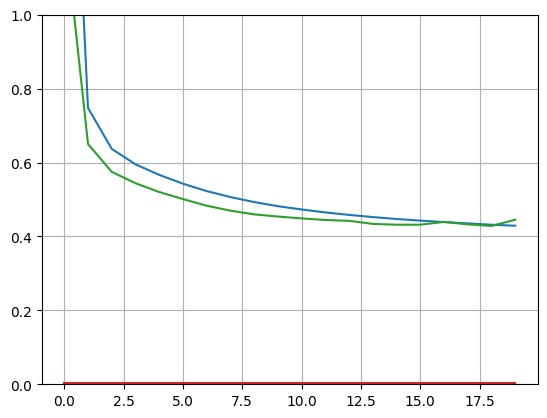

In [52]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
mse_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.3302 - accuracy: 0.0021


In [ ]:
X_new = X_test[:3] # pretend these are new instances
y_pred = model.predict(X_new)

1/1 [==============================] - 0s 64ms/step


In [ ]:
y_pred

array([[0.82912 ],
       [1.400498],
       [4.727424]], dtype=float32)

# Functional API - California Housing

In [58]:
housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [60]:
np.random.seed(42)
tf.random.set_seed(42)

## Normal Single input functional api

In [61]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

In [62]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense_8 (Dense)                (None, 30)           270         ['input_3[0][0]']                
                                                                                                  
 dense_9 (Dense)                (None, 30)           930         ['dense_8[0][0]']                
                                                                                                  
 concatenate_1 (Concatenate)    (None, 38)           0           ['input_3[0][0]',                
                                                                  'dense_9[0][0]']          

In [63]:
X_new = X_test[:3] # pretend these are new instances
y_pred = model.predict(X_new)

1/1 [==============================] - 0s 51ms/step


In [64]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)


Epoch 1/20
363/363 [==============================] - 3s 5ms/step - loss: 3.0400 - val_loss: 3.5991
Epoch 2/20
363/363 [==============================] - 2s 5ms/step - loss: 0.7461 - val_loss: 0.6362
Epoch 3/20
363/363 [==============================] - 1s 4ms/step - loss: 0.6241 - val_loss: 0.5832
Epoch 4/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5778 - val_loss: 0.5419
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5482 - val_loss: 0.5098
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5215 - val_loss: 0.4857
Epoch 7/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5038 - val_loss: 0.4749
Epoch 8/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4885 - val_loss: 0.4575
Epoch 9/20
363/363 [==============================] - 2s 5ms/step - loss: 0.4743 - val_loss: 0.4413
Epoch 10/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4639 - val_loss: 0.4347

## For different inputs along different paths

In [65]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [66]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 2s 4ms/step - loss: 2.2627 - val_loss: 1.3911
Epoch 2/20
363/363 [==============================] - 1s 4ms/step - loss: 0.8286 - val_loss: 0.6895
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6601 - val_loss: 0.5882
Epoch 4/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5913 - val_loss: 0.5344
Epoch 5/20
363/363 [==============================] - 2s 5ms/step - loss: 0.5489 - val_loss: 0.4966
Epoch 6/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5178 - val_loss: 0.4692
Epoch 7/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4949 - val_loss: 0.4479
Epoch 8/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4773 - val_loss: 0.4335
Epoch 9/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4636 - val_loss: 0.4256
Epoch 10/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4529 - val_loss: 0.4218

1/1 [==============================] - 0s 70ms/step


## Adding Auxillary Output for regularization

In [67]:
np.random.seed(42)
tf.random.set_seed(42)

In [68]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.models.Model(inputs=[input_A, input_B],
                           outputs=[output, aux_output])

In [69]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [70]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20, validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 7s 12ms/step - loss: 2.8413 - main_output_loss: 2.6420 - aux_output_loss: 4.6350 - val_loss: 1.5078 - val_main_output_loss: 1.2687 - val_aux_output_loss: 3.6593
Epoch 2/20
363/363 [==============================] - 2s 5ms/step - loss: 1.1041 - main_output_loss: 0.9021 - aux_output_loss: 2.9221 - val_loss: 0.8984 - val_main_output_loss: 0.7419 - val_aux_output_loss: 2.3072
Epoch 3/20
363/363 [==============================] - 2s 5ms/step - loss: 0.8141 - main_output_loss: 0.6756 - aux_output_loss: 2.0613 - val_loss: 0.7230 - val_main_output_loss: 0.6085 - val_aux_output_loss: 1.7537
Epoch 4/20
363/363 [==============================] - 2s 5ms/step - loss: 0.7067 - main_output_loss: 0.6032 - aux_output_loss: 1.6381 - val_loss: 0.6589 - val_main_output_loss: 0.5625 - val_aux_output_loss: 1.5268
Epoch 5/20
363/363 [==============================] - 2s 6ms/step - loss: 0.6528 - main_output_loss: 0.5664 - aux_output_loss: 1.4304 - val_los

In [71]:
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test])
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

162/162 [==============================] - 0s 2ms/step - loss: 0.4768 - main_output_loss: 0.4240 - aux_output_loss: 0.9516


1/1 [==============================] - 0s 66ms/step
